<a href="https://colab.research.google.com/github/ravi9443/Breast_Cancer_Project/blob/main/IDS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Dataset

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [ ]:
#We have add index columns to both dataframe X and y
X=X.reset_index()
y=y.reset_index()

In [ ]:
#Gives the information of all features and its datatype
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    float64
 16  compactn

In [ ]:
#Gives the information of Class and its datatype
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      569 non-null    int64 
 1   Diagnosis  569 non-null    object
dtypes: int64(1), object(1)
memory usage: 9.0+ KB


In [ ]:
# Created New dataframe by adding X and y, so that data analysis can be done on whole dataset
data=pd.merge(X,y,on='index')

In [ ]:
data.head()

,index,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [ ]:
# Gives the shape of the data dataframe
data.shape

(569, 32)

In [ ]:
# Gives the Name of the class in the dataset
y['Diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
# Make the new columns that contains the range of all features of our dataset
describedData=data.describe().T
describedData['range']=describedData['max']-describedData['min']

In [ ]:
describedData['range']

index                  568.000000
radius1                 21.129000
texture1                29.570000
perimeter1             144.710000
area1                 2357.500000
smoothness1              0.110770
compactness1             0.326020
concavity1               0.426800
concave_points1          0.201200
symmetry1                0.198000
fractal_dimension1       0.047480
radius2                  2.761500
texture2                 4.524800
perimeter2              21.223000
area2                  535.398000
smoothness2              0.029417
compactness2             0.133148
concavity2               0.396000
concave_points2          0.052790
symmetry2                0.071068
fractal_dimension2       0.028945
radius3                 28.110000
texture3                37.520000
perimeter3             200.790000
area3                 4068.800000
smoothness3              0.151430
compactness3             1.030710
concavity3               1.252000
concave_points3          0.291000
symmetry3     

In [ ]:
# Gives the mean value for all attribute with respect to diagnosis
data.groupby('Diagnosis').mean().T

Diagnosis,B,M
index,319.899160,223.547170
radius1,12.146524,17.462830
texture1,17.914762,21.604906
perimeter1,78.075406,115.365377
area1,462.790196,978.376415
smoothness1,0.092478,0.102898
compactness1,0.080085,0.145188
concavity1,0.046058,0.160775
concave_points1,0.025717,0.087990
symmetry1,0.174186,0.192909


In [ ]:
# Drop the index column as it is of no use from all three dataframes
data.drop('index',axis=1,inplace=True)
X.drop('index',axis=1,inplace=True)
y.drop('index',axis=1,inplace=True)

In [ ]:
# Convert M to 1 and B to 0
data['Diagnosis']=pd.Categorical(data.Diagnosis).codes
data['Diagnosis'].unique()
data.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
y['Diagnosis']=pd.Categorical(y.Diagnosis).codes
y['Diagnosis'].unique()
y.head()

,Diagnosis
0,1
1,1
2,1
3,1
4,1


In [ ]:
# Gives the details of missing value in each attribute
X.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [ ]:
# Find the duplicate values for each row
duplicateRows=data.duplicated()
count=0
for duplicate in duplicateRows:
  if duplicate == True:
    count=count+1

print('Number of duplicate Rows', count)

Number of duplicate Rows 0


In [ ]:
feature_list=list(data.columns[:30])
feature_list

['radius1',
 'texture1',
 'perimeter1',
 'area1',
 'smoothness1',
 'compactness1',
 'concavity1',
 'concave_points1',
 'symmetry1',
 'fractal_dimension1',
 'radius2',
 'texture2',
 'perimeter2',
 'area2',
 'smoothness2',
 'compactness2',
 'concavity2',
 'concave_points2',
 'symmetry2',
 'fractal_dimension2',
 'radius3',
 'texture3',
 'perimeter3',
 'area3',
 'smoothness3',
 'compactness3',
 'concavity3',
 'concave_points3',
 'symmetry3',
 'fractal_dimension3']

In [ ]:
scaler=StandardScaler()
scaled_array=scaler.fit_transform(data[feature_list])
scaled_array[:1]

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
         3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
         2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
         1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
         1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
         2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461]])

In [ ]:
data_copy=pd.DataFrame(scaled_array,columns=feature_list)
data_copy=pd.concat([data_copy,data.loc[:,"Diagnosis"]],axis=1)
data_1=pd.melt(data_copy,id_vars="Diagnosis")
data_1

,Diagnosis,variable,value
0,1,radius1,1.097064
1,1,radius1,1.829821
2,1,radius1,1.579888
3,1,radius1,-0.768909
4,1,radius1,1.750297
...,...,...,...
17065,1,fractal_dimension3,-0.709091
17066,1,fractal_dimension3,-0.973978
17067,1,fractal_dimension3,-0.318409
17068,1,fractal_dimension3,2.219635


In [ ]:
data

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


Box Plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'radius1'),
  Text(1, 0, 'texture1'),
  Text(2, 0, 'perimeter1'),
  Text(3, 0, 'area1'),
  Text(4, 0, 'smoothness1'),
  Text(5, 0, 'compactness1'),
  Text(6, 0, 'concavity1'),
  Text(7, 0, 'concave_points1'),
  Text(8, 0, 'symmetry1'),
  Text(9, 0, 'fractal_dimension1'),
  Text(10, 0, 'radius2'),
  Text(11, 0, 'texture2'),
  Text(12, 0, 'perimeter2'),
  Text(13, 0, 'area2'),
  Text(14, 0, 'smoothness2'),
  Text(15, 0, 'compactness2'),
  Text(16, 0, 'concavity2'),
  Text(17, 0, 'concave_points2'),
  Text(18, 0, 'symmetry2'),
  Text(19, 0, 'fractal_dimension2'),
  Text(20, 0, 'radius3'),
  Text(21, 0, 'texture3'),
  Text(22, 0, 'perimeter3'),
  Text(23, 0, 'area3'),
  Text(24, 0, 'smoothness3'),
  Text(25, 0, 'compactness3'),
  Text(26, 0, 'concavity3'),
  Text(27, 0, 'concave_points3'),
  Text(28, 0, 'symmetry3'),
  Text(29, 0, 'fractal_d

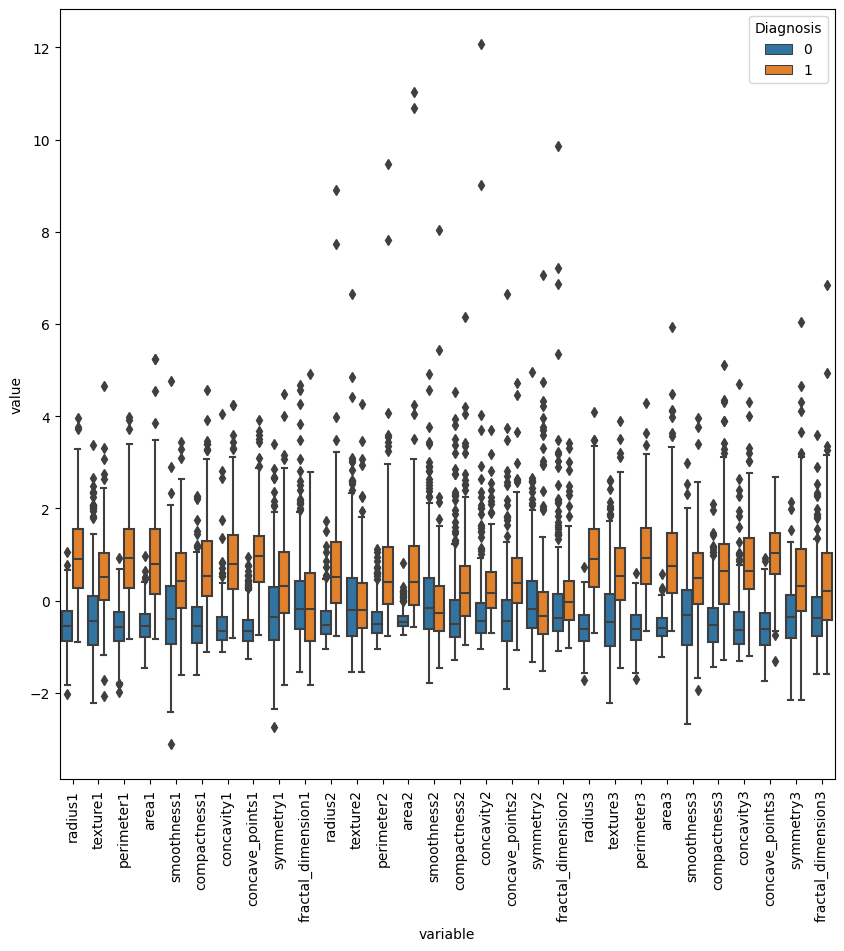

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x="variable",y="value",hue="Diagnosis",data=data_1)
plt.xticks(rotation=90)

Correlation Analysis

In [ ]:
corr=X.corr(numeric_only=True)
corr

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
radius1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture1,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter1,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area1,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness1,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness1,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity1,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points1,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry1,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension1,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [ ]:
# # HeatMap for Correlation
# ax=plt.figure(figsize=(25,25))
# sns.heatmap(corr,annot=True, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(100, 500, n=500),square=True)

Here is the pie chart of the diagnosis

([<matplotlib.patches.Wedge at 0x7a4ec3ebe530>,
 [Text(-0.44813900450084804, 1.0590899077250189, 'Benign'),
  Text(0.428654605109445, -1.013042560566172, 'Malignant')])

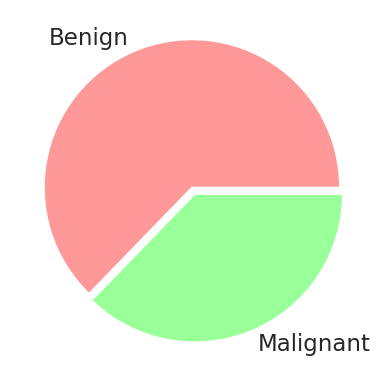

In [ ]:
pie=data['Diagnosis'].value_counts()
myLabels=["Benign","Malignant"]
sns.set(font_scale=1.5)
plt.pie(pie,labels=myLabels,explode=(0.05,0),colors=['#ff9999','#99ff99'])


In [ ]:
# Gives the number of Benign and Malignant Diagnosis
data['Diagnosis'].value_counts()

0    357
1    212
Name: Diagnosis, dtype: int64

In [ ]:
y['Diagnosis']=pd.Categorical(y.Diagnosis).codes
y['Diagnosis'].unique()
y.head()

,Diagnosis
0,1
1,1
2,1
3,1
4,1


Count Plot

Text(0.5, 0, '0=Benign       1=Malignant')

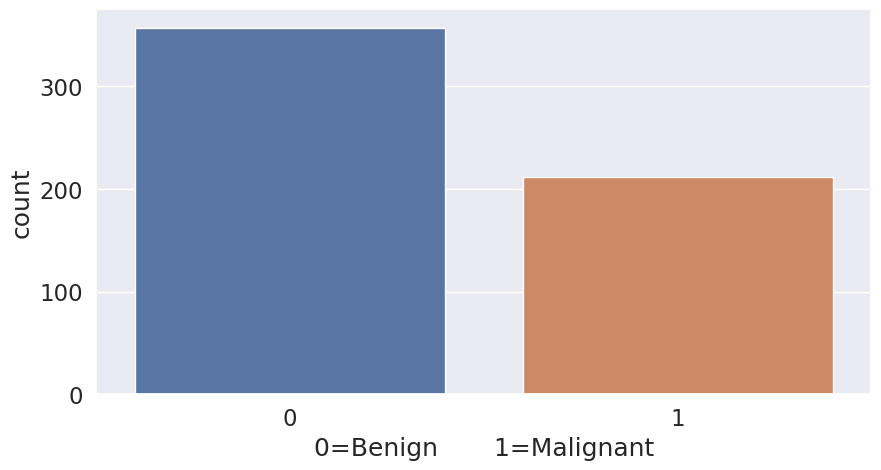

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Diagnosis',data=y)
sns.set(font_scale=2)

plt.xlabel('0=Benign       1=Malignant')



Histogram Analysis

<Axes: xlabel='radius1', ylabel='Count'>

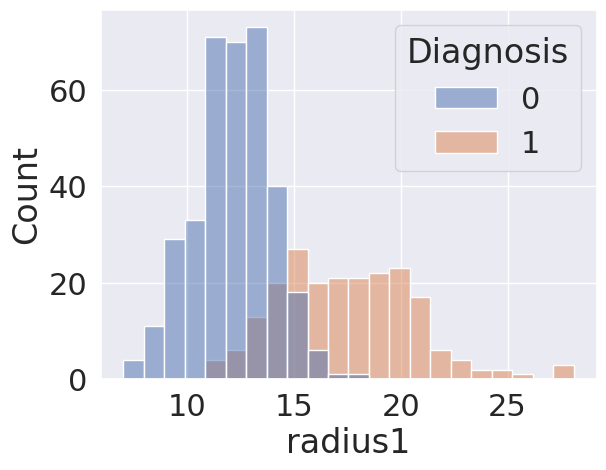

In [ ]:
sns.histplot(data=data,x='radius1',hue='Diagnosis')

<Axes: xlabel='texture1', ylabel='Count'>

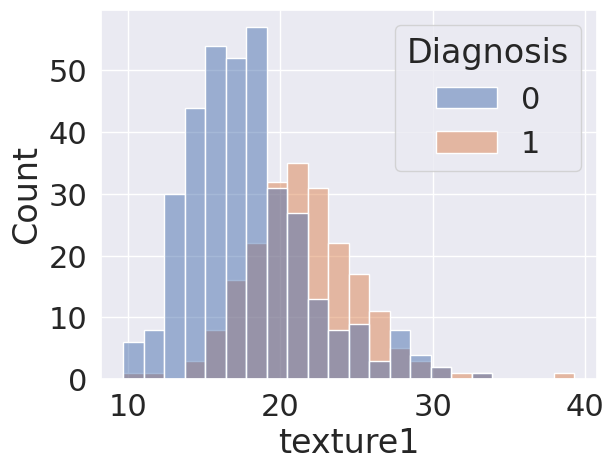

In [ ]:
sns.histplot(data=data,x='texture1',hue='Diagnosis')

<Axes: xlabel='perimeter1', ylabel='Count'>

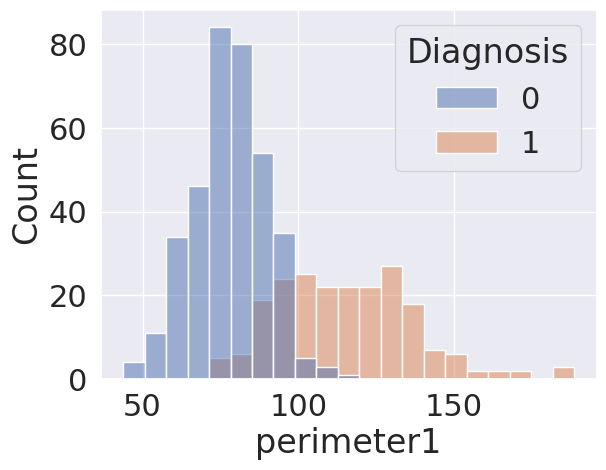

In [ ]:
sns.histplot(data=data,x='perimeter1',hue='Diagnosis')

<Axes: xlabel='area1', ylabel='Count'>

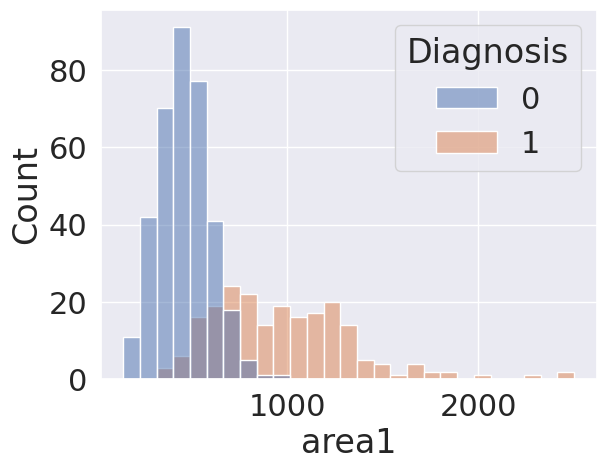

In [ ]:
sns.histplot(data=data,x='area1',hue='Diagnosis')

<Axes: xlabel='smoothness1', ylabel='Count'>

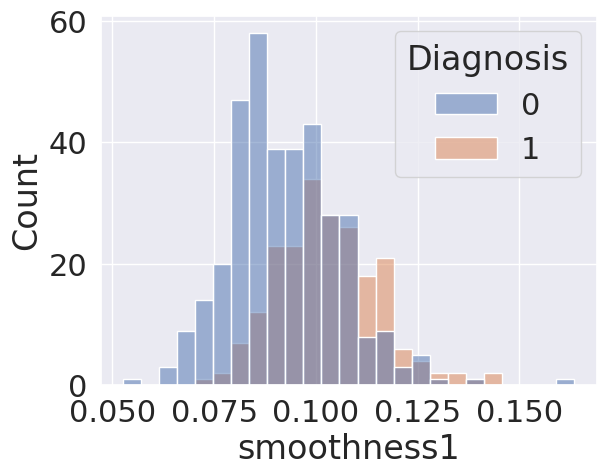

In [ ]:
sns.histplot(data=data,x='smoothness1',hue='Diagnosis')

<Axes: xlabel='compactness1', ylabel='Count'>

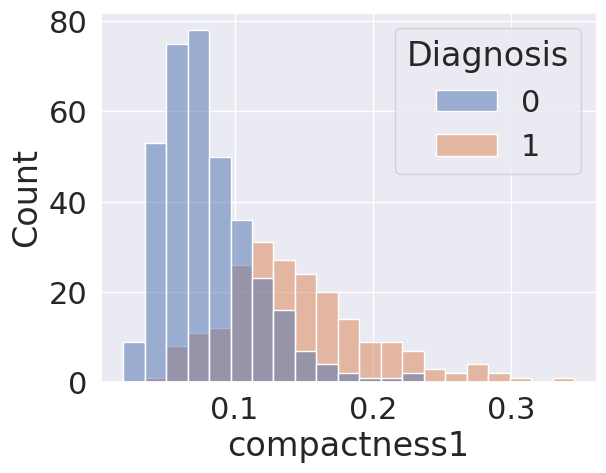

In [ ]:
sns.histplot(data=data,x='compactness1',hue='Diagnosis')

<Axes: xlabel='concavity1', ylabel='Count'>

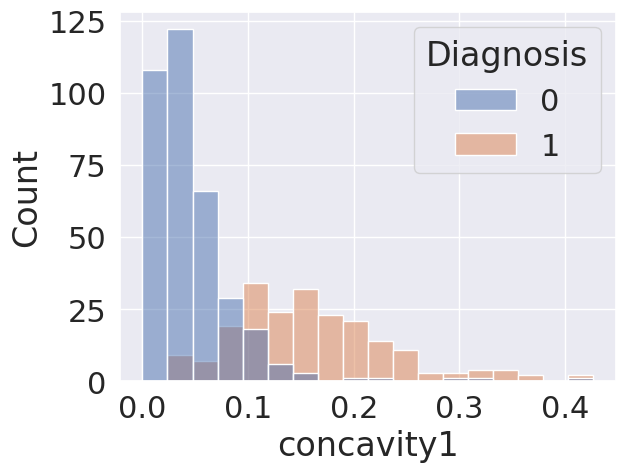

In [ ]:
sns.histplot(data=data,x='concavity1',hue='Diagnosis')

<Axes: xlabel='concave_points1', ylabel='Count'>

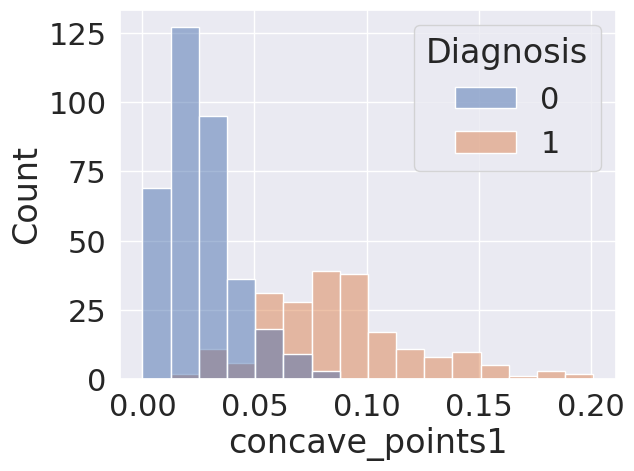

In [ ]:
sns.histplot(data=data,x='concave_points1',hue='Diagnosis')

<Axes: xlabel='symmetry1', ylabel='Count'>

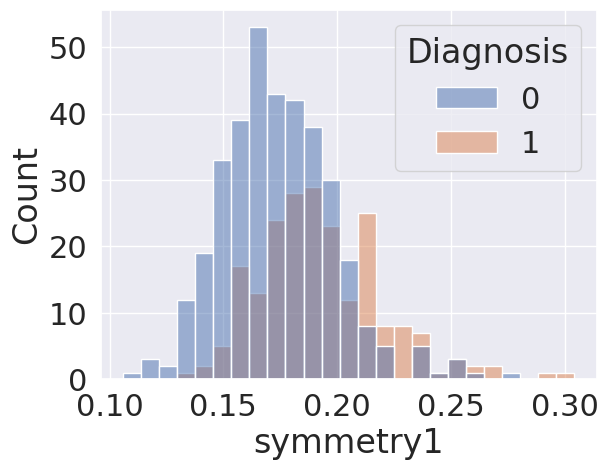

In [ ]:
sns.histplot(data=data,x='symmetry1',hue='Diagnosis')

<Axes: xlabel='fractal_dimension1', ylabel='Count'>

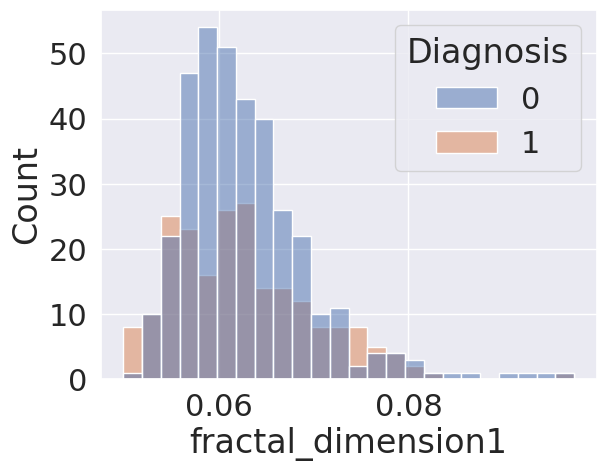

In [ ]:
sns.histplot(data=data,x='fractal_dimension1',hue='Diagnosis')

Scatter Plot

In [ ]:
# cols=['Diagnosis',
#     'radius1',
#       'texture1',
#       'perimeter1',
#       'area1',
#       'smoothness1',
#       'compactness1',
#       'concavity1',
#       'concave_points1',
#       'symmetry1',
#       'fractal_dimension1']
# sns.pairplot(data=data[cols],hue='Diagnosis')

**Machine Learning Algorithms**

Spliting the data into training data and testing data

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
print(X_train.shape,X_test.shape)

(455, 30) (114, 30)


Model Training

In [ ]:
# Normalization of the data using standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Dimensionality Reduction have been done using PCA
pca=PCA(n_components=10)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

**Logistic** **Regression**

In [ ]:
classifier1=LogisticRegression(random_state=0)
classifier1.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [ ]:
X_train_prediction_LR=classifier1.predict(X_train)
training_data_accuracy_LR=accuracy_score(Y_train,X_train_prediction_LR)

In [ ]:
print('Accuracy on training data =', training_data_accuracy_LR)

Accuracy on training data = 0.9868131868131869


In [ ]:
X_test_prediction_LR=classifier1.predict(X_test)
testing_data_accuracy_LR=accuracy_score(Y_test,X_test_prediction_LR)

In [ ]:
print('Accuracy on testing data =', testing_data_accuracy_LR)

Accuracy on testing data = 0.9736842105263158


In [ ]:
cm1=confusion_matrix(Y_test,X_test_prediction_LR)
cm1

array([[68,  1],
       [ 2, 43]])

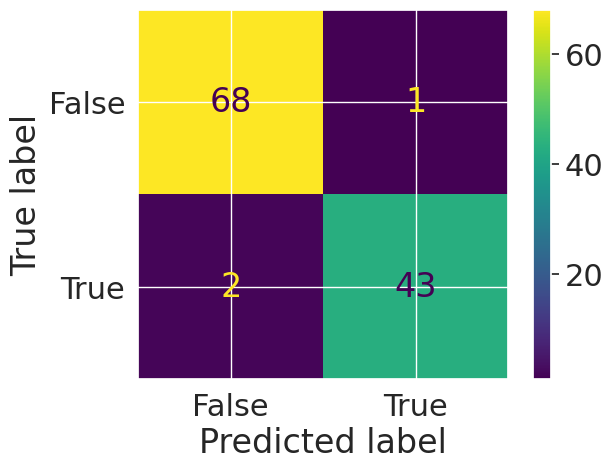

In [ ]:
cm_display1=metrics.ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=[False,True])
cm_display1.plot()

In [ ]:
# All the Performance metrics are given below
print(classification_report(Y_test,X_test_prediction_LR))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        69
           1       0.98      0.96      0.97        45

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Random **Forest** **Classification**

In [ ]:
classifier2=RandomForestClassifier()
classifier2.fit(X_train,Y_train)

<ipython-input-55-71c571a74566>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier2.fit(X_train,Y_train)


RandomForestClassifier()

In [ ]:
X_train_prediction_RF=classifier2.predict(X_train)
training_data_accuracy_RF=accuracy_score(Y_train,X_train_prediction_RF)

In [ ]:
print('Accuracy on training data =', training_data_accuracy_RF)

Accuracy on training data = 1.0


In [ ]:
X_test_prediction_RF=classifier2.predict(X_test)
testing_data_accuracy_RF=accuracy_score(Y_test,X_test_prediction_RF)

In [ ]:
print('Accuracy on testing data =', testing_data_accuracy_RF)

Accuracy on testing data = 0.956140350877193


In [ ]:
confusion_matrix(Y_train,X_train_prediction_RF)

array([[288,   0],
       [  0, 167]])

In [ ]:
cm2=confusion_matrix(Y_test,X_test_prediction_RF)
cm2

array([[67,  2],
       [ 3, 42]])

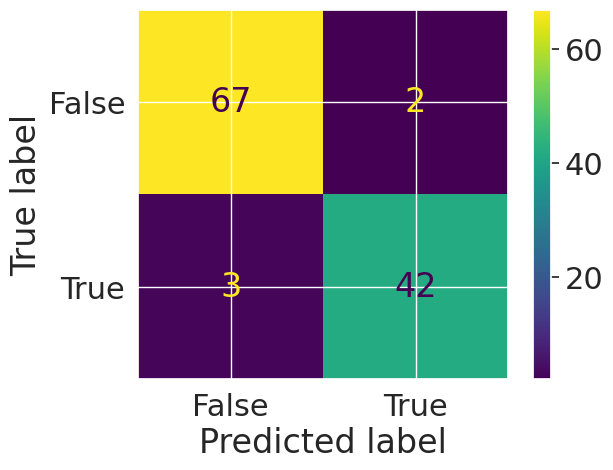

In [ ]:
cm_display2=metrics.ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=[False,True])
cm_display2.plot()

In [ ]:
print(classification_report(Y_test,X_test_prediction_RF))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        69
           1       0.95      0.93      0.94        45

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



K **Nearest** **Neighbor**

In [ ]:
classifier3=KNeighborsClassifier()
classifier3.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
X_train_prediction_KNN=classifier3.predict(X_train)
training_data_accuracy_KNN=accuracy_score(Y_train,X_train_prediction_KNN)

In [ ]:
print('Accuracy on training data =', training_data_accuracy_KNN)

Accuracy on training data = 0.9714285714285714


In [ ]:
X_test_prediction_KNN=classifier3.predict(X_test)
testing_data_accuracy_KNN=accuracy_score(Y_test,X_test_prediction_KNN)

In [ ]:
print('Accuracy on testing data =', testing_data_accuracy_KNN)

Accuracy on testing data = 0.9736842105263158


In [ ]:
confusion_matrix(Y_train,X_train_prediction_KNN)

array([[286,   2],
       [ 11, 156]])

In [ ]:
cm3=confusion_matrix(Y_test,X_test_prediction_KNN)

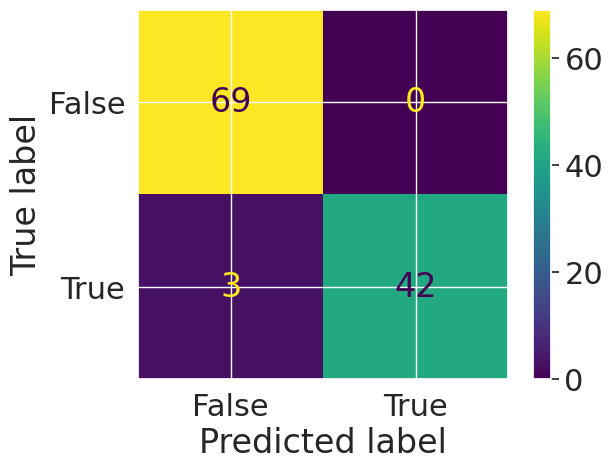

In [ ]:
cm_display3=metrics.ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=[False,True])
cm_display3.plot()

In [ ]:
print(classification_report(Y_test,X_test_prediction_KNN))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        69
           1       1.00      0.93      0.97        45

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**Support** **Vector** **Classification**

In [ ]:
classifier4=SVC(kernel='linear')
classifier4.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [ ]:
X_train_prediction_SVC=classifier4.predict(X_train)
training_data_accuracy_SVC=accuracy_score(Y_train,X_train_prediction_SVC)

In [ ]:
print('Accuracy on training data =', training_data_accuracy_SVC)

Accuracy on training data = 0.9868131868131869


In [ ]:
X_test_prediction_SVC=classifier4.predict(X_test)
testing_data_accuracy_SVC=accuracy_score(Y_test,X_test_prediction_SVC)

In [ ]:
print('Accuracy on testing data =', testing_data_accuracy_SVC)

Accuracy on testing data = 0.956140350877193


In [ ]:
confusion_matrix(Y_train,X_train_prediction_SVC)

array([[287,   1],
       [  5, 162]])

In [ ]:
cm4=confusion_matrix(Y_test,X_test_prediction_SVC)

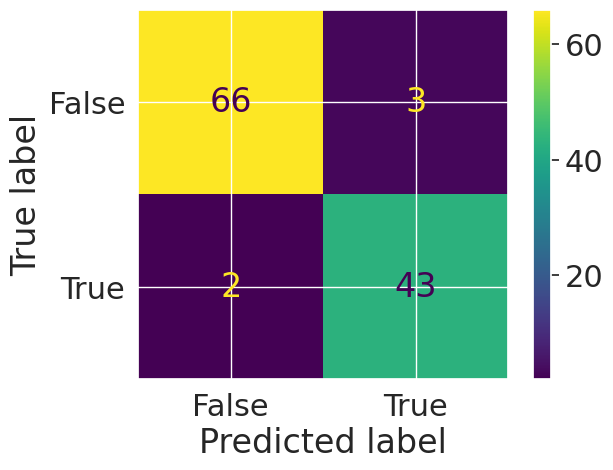

In [ ]:
cm_display4=metrics.ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=[False,True])
cm_display4.plot()

In [ ]:
print(classification_report(Y_test,X_test_prediction_SVC))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        69
           1       0.93      0.96      0.95        45

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

